<a href="https://colab.research.google.com/github/r-diazp/deepL/blob/master/LTSM_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Librerias

In [41]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#DataSet

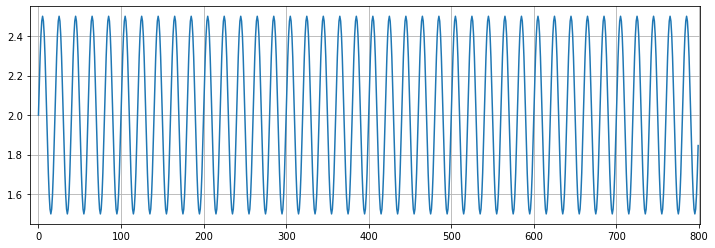

In [42]:
#Crear funcion de prueba 
x = torch.linspace(0,799, steps=800)
fx = torch.sin(x*2*3.1416/40)*torch.cos(x*2*3.1416/40) + 2

plt.figure(figsize=(12,4))
plt.xlim(-10,801)
plt.grid(True)
plt.plot(y.numpy());

#Set de datos
test_size = 40
train_set = fx[:-test_size]
test_set = fx[-test_size:]

In [43]:
#Funcion determinar ventana de los tensores 
def input_data(sequence, windows_size):  #Windows_size tamaño de la ventana 
    output = []
    L = len(sequence)
    for i in range(L - windows_size):
        window = sequence[i : i+windows_size]
        label = sequence[i+windows_size : i+windows_size+1]
        output.append((window, label))
    return output

In [46]:
#Crear datos de entrenamiento (Tuplas de Sequencia & etiquetas)
window_size = 40
train_data = input_data(train_set, window_size)

print(len(train_data)) #760-40
train_data[:2]

720


[(tensor([2.0000, 2.1545, 2.2939, 2.4045, 2.4755, 2.5000, 2.4755, 2.4045, 2.2939,
          2.1545, 2.0000, 1.8455, 1.7061, 1.5955, 1.5245, 1.5000, 1.5245, 1.5955,
          1.7061, 1.8455, 2.0000, 2.1545, 2.2939, 2.4045, 2.4755, 2.5000, 2.4755,
          2.4045, 2.2939, 2.1545, 2.0000, 1.8455, 1.7061, 1.5955, 1.5245, 1.5000,
          1.5245, 1.5955, 1.7061, 1.8455]), tensor([2.0000])),
 (tensor([2.1545, 2.2939, 2.4045, 2.4755, 2.5000, 2.4755, 2.4045, 2.2939, 2.1545,
          2.0000, 1.8455, 1.7061, 1.5955, 1.5245, 1.5000, 1.5245, 1.5955, 1.7061,
          1.8455, 2.0000, 2.1545, 2.2939, 2.4045, 2.4755, 2.5000, 2.4755, 2.4045,
          2.2939, 2.1545, 2.0000, 1.8455, 1.7061, 1.5955, 1.5245, 1.5000, 1.5245,
          1.5955, 1.7061, 1.8455, 2.0000]),
  tensor([2.1545]))]

#Arquitectura ANN

In [47]:
class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_size=50, out_size=1):
        super().__init__()
        self.hidden_size = hidden_size
        
        self.lstm = nn.LSTM(input_size, hidden_size) #Agregar una capa LSTM
        self.linear = nn.Linear(hidden_size, out_size) #Agregar Full connect 
        self.hidden = (torch.zeros(1,1,hidden_size), #Inicializar h0 y c0
                       torch.zeros(1,1,hidden_size))
    
    
    def forward(self, seq):
        lstm_out, self.hidden = self.lstm(seq.view(len(seq), 1, -1), self.hidden)
        pred = self.linear(lstm_out.view(len(seq),-1) )        
        return pred[-1]   #Solo tomamos la ultima prediccion 


    def train_model(self, train_data, target, epochs=10, window_size=40):
      for epoch in range(epochs):       
        for seq, y_train in train_data: #Separamos los datos de la tupla
            
            #Resetear estados
            optimizer.zero_grad()
            model.hidden = (torch.zeros(1, 1, model.hidden_size),
                            torch.zeros(1, 1, model.hidden_size))
            
            y_pred = self.forward(seq)        
            loss = criterion(y_pred, y_train)
            loss.backward()
            optimizer.step()

        print(f'Epoch: {epoch + 1: 2} Loss: {loss.item():10.8f}')
      
        #Hacer Predicciones        
        #Iniciamos la lista con los ultimos 10 registros entrenados 
        preds = train_set[-window_size:].tolist()

        for f in range(window_size):  
            seq = torch.FloatTensor(preds[-window_size:])
            with torch.no_grad():
                model.hidden = (torch.zeros(1,1,model.hidden_size),
                                torch.zeros(1,1,model.hidden_size))            

                preds.append(model(seq).item())
              
        loss = criterion(torch.tensor(preds[-window_size:]), target[760:] )
        print(f'Loss on test predictions: {loss}')

        #Grafica de resultados      
        plt.figure(figsize=(12, 4) )
        plt.xlim(700,801)
        plt.grid(True)
        plt.plot(target.numpy())
        plt.plot(range(760,800),preds[window_size: ])
        plt.show()


In [49]:
#Instanciar modelo
torch.manual_seed(30)
model = LSTM()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
print(f'cuda: {next(model.parameters()).is_cuda}')
model

cuda: False


LSTM(
  (lstm): LSTM(1, 50)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)

Epoch:  1 Loss: 0.00931161
Loss on test predictions: 0.15436139702796936


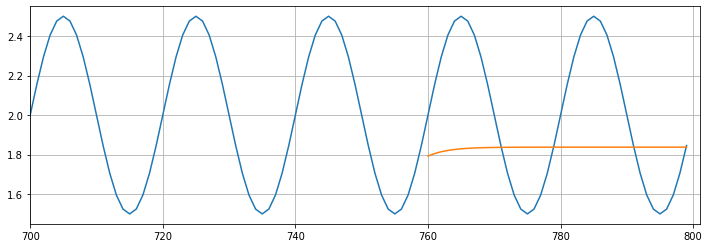

Epoch:  2 Loss: 0.01359902
Loss on test predictions: 0.15627826750278473


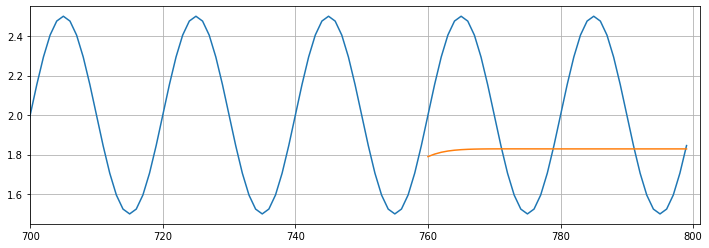

Epoch:  3 Loss: 0.01642010
Loss on test predictions: 0.15668050944805145


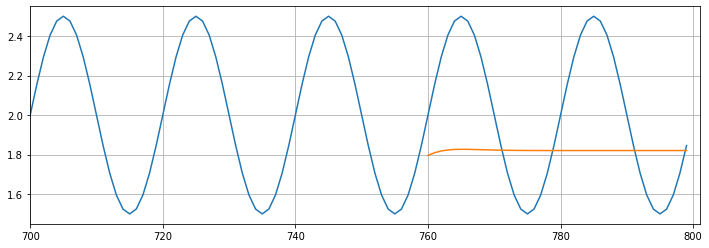

Epoch:  4 Loss: 0.01520394
Loss on test predictions: 0.1501336693763733


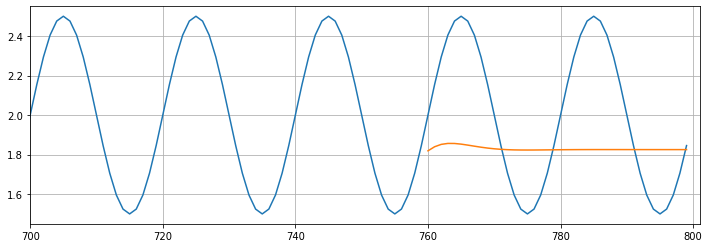

Epoch:  5 Loss: 0.00764415
Loss on test predictions: 0.128414124250412


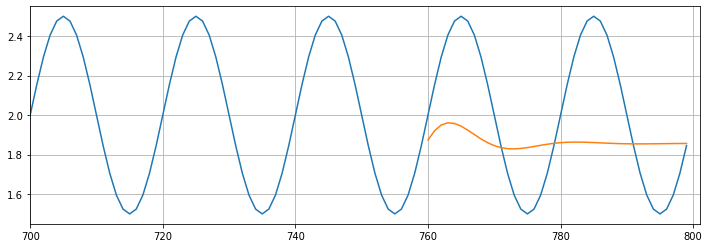

Epoch:  6 Loss: 0.00035613
Loss on test predictions: 0.08909469842910767


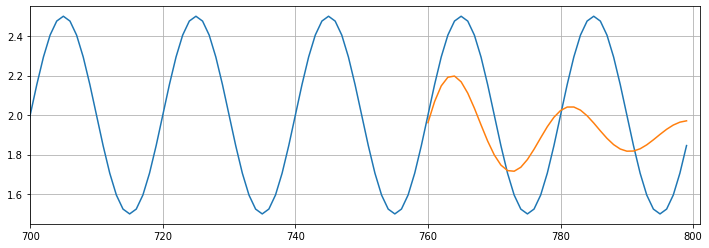

Epoch:  7 Loss: 0.00025696
Loss on test predictions: 0.020279239863157272


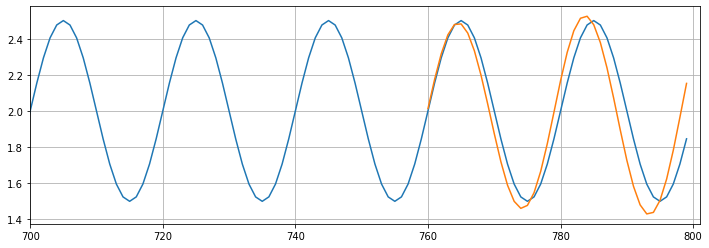

Epoch:  8 Loss: 0.00003660
Loss on test predictions: 0.002775099128484726


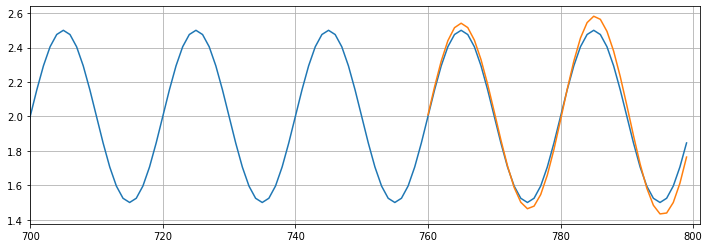

Epoch:  9 Loss: 0.00000163
Loss on test predictions: 8.823545067571104e-05


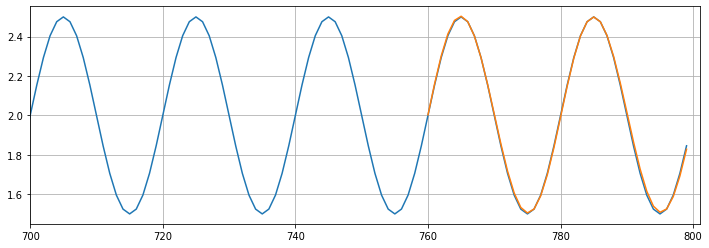

Epoch:  10 Loss: 0.00000438
Loss on test predictions: 7.654436922166497e-05


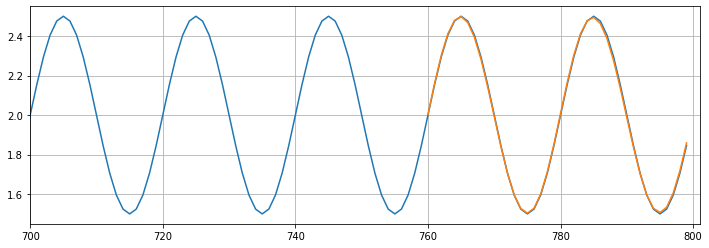

In [51]:
#Entrenamiento del modelo 
model.train_model(train_data, fx, 10)

#Probar modelo

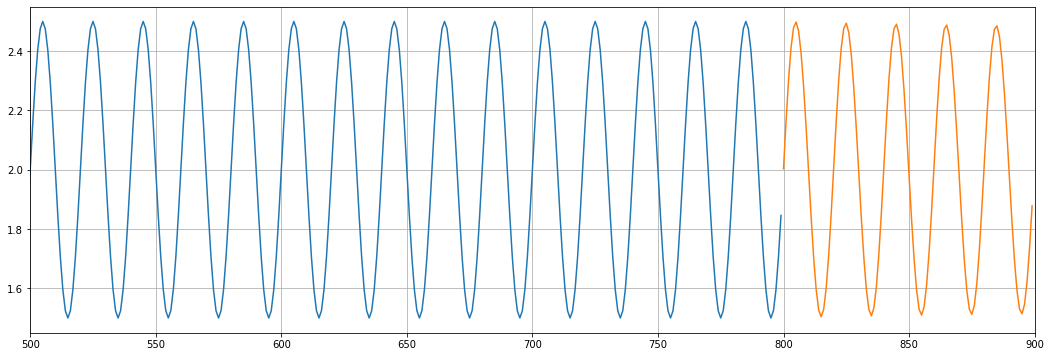

In [52]:
predicition = y[-window_size:].tolist()
pred_future = 100
for i in range(pred_future):  
    sequence = torch.FloatTensor(predicition[-window_size:])
    with torch.no_grad():        
        model.hidden = (torch.zeros(1,1,model.hidden_size), #Reset parametros
                        torch.zeros(1,1,model.hidden_size))  
        predicition.append(model(sequence).item())

plt.figure(figsize=(18,6))
plt.xlim(500,800 + pred_future)
plt.grid(True)
plt.plot(y.numpy())
plt.plot(range(800,800 + pred_future),predicition[window_size:])
plt.show()